In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

## Load dataset

Digit Dataset

In [2]:
X, y = datasets.load_digits(return_X_y=True)

## Prepare data for traning

Split data (Usually 30% of data are allocated for test)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Standardize data

In [4]:
sc = StandardScaler()

Compute the mean and standard deviation of data

In [5]:
sc.fit(X_train)

StandardScaler()

Perform standardization

In [6]:
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Perceptron classification

In [7]:
from sklearn.linear_model import Perceptron

In [8]:
start_time = time.time()
p = Perceptron(max_iter=100, eta0=0.01, random_state=1)
p.fit(X_train_std, y_train)
print("Running time:  %s seconds " % (time.time() - start_time))

Running time:  0.018477678298950195 seconds 


Predict the test dataset

In [9]:
yp_p = p.predict(X_test_std)
print(classification_report(y_test, yp_p))
print('Accuracy: %.2f' % accuracy_score(y_test, yp_p))
print('MSE: %.2f' % mean_squared_error(y_test, yp_p))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        54
           1       0.91      0.89      0.90        55
           2       0.96      0.96      0.96        53
           3       0.98      0.91      0.94        55
           4       0.93      0.96      0.95        54
           5       0.89      0.91      0.90        55
           6       0.96      0.96      0.96        54
           7       0.98      0.93      0.95        54
           8       0.92      0.88      0.90        52
           9       0.91      0.94      0.93        54

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.94      0.94      0.94       540

Accuracy: 0.94
MSE: 1.44


## Linear SVM classification

In [10]:
from sklearn.svm import SVC

In [11]:
start_time = time.time()
svm_l = SVC(kernel='linear', C=1.0, random_state=1)
svm_l.fit(X_train_std, y_train)
print(" Running time: %s seconds " % (time.time() - start_time))
# Predict the test dataset
yp_svm_l = svm_l.predict(X_test_std)
print(classification_report(y_test, yp_svm_l))
print('Accuracy: %.2f' % accuracy_score(y_test, yp_svm_l))
print('MSE: %.2f' % mean_squared_error(y_test, yp_svm_l))

 Running time: 0.030421733856201172 seconds 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.92      1.00      0.96        55
           2       1.00      1.00      1.00        53
           3       1.00      0.96      0.98        55
           4       1.00      1.00      1.00        54
           5       0.96      0.96      0.96        55
           6       0.98      1.00      0.99        54
           7       0.98      0.98      0.98        54
           8       0.96      0.88      0.92        52
           9       0.98      0.98      0.98        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Accuracy: 0.98
MSE: 0.57


## Non-linear SVM classification

In [12]:
from sklearn.svm import SVC

In [13]:
start_time = time.time()
svm_n = SVC(kernel='rbf', C=10, gamma=0.01, random_state=1)
svm_n.fit(X_train_std, y_train)
print(" Running time: %s seconds " % (time.time() - start_time))

 Running time: 0.038684844970703125 seconds 


Predict the test dataset

In [14]:
yp_svm_n = svm_n.predict(X_test_std)
print(classification_report(y_test, yp_svm_n))
print('Accuracy: %.2f' % accuracy_score(y_test, yp_svm_n))
print('Accuracy: %.2f' % mean_squared_error(y_test, yp_svm_n))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      1.00      0.98        55
           2       0.98      1.00      0.99        53
           3       1.00      0.96      0.98        55
           4       1.00      1.00      1.00        54
           5       0.96      0.95      0.95        55
           6       0.98      1.00      0.99        54
           7       0.98      1.00      0.99        54
           8       1.00      0.94      0.97        52
           9       0.96      0.98      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Accuracy: 0.98
Accuracy: 0.28


## Decision tree classification

In [15]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [16]:
start_time = time.time()
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)
tree_model.fit(X_train, y_train)
print(" Running time: %s seconds " % (time.time() - start_time))

 Running time: 0.041646480560302734 seconds 


Plot the decision tree model

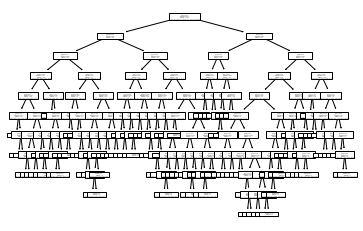

In [17]:
tree.plot_tree(tree_model)
plt.show()

Predict the test dataset

In [18]:
yp_td = tree_model.predict(X_test)
print(classification_report(y_test, yp_td))
print('Accuracy: %.2f' % accuracy_score(y_test, yp_td))
print('MSE: %.2f' % mean_squared_error(y_test, yp_td))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        54
           1       0.88      0.76      0.82        55
           2       0.87      0.91      0.89        53
           3       0.89      0.91      0.90        55
           4       0.80      0.81      0.81        54
           5       0.84      0.85      0.85        55
           6       0.94      0.94      0.94        54
           7       0.88      0.91      0.89        54
           8       0.81      0.85      0.83        52
           9       0.94      0.93      0.93        54

    accuracy                           0.88       540
   macro avg       0.88      0.88      0.88       540
weighted avg       0.88      0.88      0.88       540

Accuracy: 0.88
MSE: 1.84


## Letter recognition dataset

In [19]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data'
data = pd.read_csv(url, header=None)
X1 = data.iloc[:, 1:]
y1 = data.iloc[:,0]

In [20]:
# Split data (Usually 30% of data are allocated for test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1, stratify=y1)
# Standardize data
sc = StandardScaler()
# Compute the mean and standard deviation of data
sc.fit(X1_train)
# Perform standardization
X1_train_std = sc.transform(X1_train)
X1_test_std = sc.transform(X1_test)

## Perceptron

In [21]:
start_time = time.time()
ppn = Perceptron(max_iter=100, eta0=0.001, random_state=1)
ppn.fit(X1_train_std, y1_train)
print(" Running time: %s seconds " % (time.time() - start_time))
# Predict the test dataset
yp_p = ppn.predict(X1_test_std)
print(classification_report(y1_test, yp_p))
print('Accuracy: %.2f' % accuracy_score(y1_test, yp_p))

 Running time: 0.12261199951171875 seconds 
              precision    recall  f1-score   support

           A       0.99      0.80      0.89       237
           B       0.35      0.43      0.39       230
           C       0.84      0.49      0.62       221
           D       0.53      0.50      0.51       241
           E       0.34      0.25      0.29       230
           F       0.59      0.25      0.35       233
           G       0.15      0.59      0.24       232
           H       0.13      0.19      0.15       220
           I       0.59      0.79      0.68       226
           J       0.81      0.39      0.53       224
           K       0.21      0.38      0.27       222
           L       0.89      0.22      0.35       228
           M       0.69      0.85      0.76       238
           N       0.57      0.38      0.45       235
           O       0.22      0.35      0.27       226
           P       0.81      0.62      0.70       241
           Q       0.70      0.26    

## SVM

In [22]:
start_time = time.time()
svm_n = SVC(kernel='rbf', C=10, gamma=0.01, random_state=1)
svm_n.fit(X1_train_std, y1_train)
print(" Running time: %s seconds " % (time.time() - start_time))
# Predict the test dataset
yp_svm_n = svm_n.predict(X1_test_std)
print(classification_report(y1_test, yp_svm_n))
print('Accuracy: %.2f' % accuracy_score(y1_test, yp_svm_n))

 Running time: 2.0313639640808105 seconds 
              precision    recall  f1-score   support

           A       0.95      0.95      0.95       237
           B       0.87      0.93      0.90       230
           C       0.93      0.90      0.92       221
           D       0.82      0.94      0.87       241
           E       0.88      0.89      0.89       230
           F       0.88      0.92      0.90       233
           G       0.83      0.88      0.85       232
           H       0.88      0.77      0.82       220
           I       0.95      0.92      0.93       226
           J       0.92      0.91      0.92       224
           K       0.91      0.84      0.87       222
           L       0.99      0.89      0.94       228
           M       0.94      0.95      0.94       238
           N       0.94      0.93      0.94       235
           O       0.89      0.89      0.89       226
           P       0.98      0.91      0.94       241
           Q       0.93      0.91     

## DecisionTree

In [23]:
start_time = time.time()
tree_model2 = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)
tree_model2.fit(X1_train, y1_train)
print(" Running time: %s seconds " % (time.time() - start_time))
# Predict the test dataset
yp_td = tree_model2.predict(X1_test)
print(classification_report(y1_test, yp_td))
print('Accuracy: %.2f' % accuracy_score(y1_test, yp_td))

 Running time: 0.08654141426086426 seconds 
              precision    recall  f1-score   support

           A       0.92      0.94      0.93       237
           B       0.79      0.86      0.82       230
           C       0.91      0.90      0.90       221
           D       0.80      0.82      0.81       241
           E       0.84      0.85      0.84       230
           F       0.84      0.84      0.84       233
           G       0.82      0.86      0.84       232
           H       0.80      0.80      0.80       220
           I       0.90      0.92      0.91       226
           J       0.90      0.88      0.89       224
           K       0.85      0.77      0.81       222
           L       0.91      0.93      0.92       228
           M       0.94      0.93      0.94       238
           N       0.92      0.89      0.91       235
           O       0.81      0.84      0.82       226
           P       0.87      0.86      0.86       241
           Q       0.87      0.80    

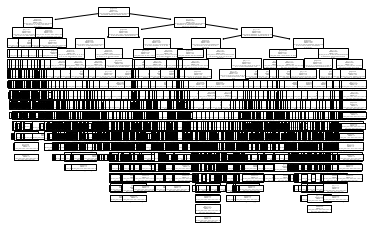

In [25]:
# Plot the decision tree model
tree.plot_tree(tree_model2)
plt.show()

* The reported accuracy and MSE is the avarage accuracy and MSE on the test data.

For "digit dataset":

- The running time of perceptron is 0.018, the accuracy is 0.94 and the MSE is 1.44.
- Here, I applied both the linear and nonlinear model of SVM on this dataset and both of them has accuracy of 0.98. However, the MSE of of linear SVM is 0.57 while for nonlinear SVM is 0.28. The linear SVM is faster than nonlinear SVM. The running time of linear SVM is 0.034 while for nonlinear SVM is about 0.050.
- The runniing time of decision tree classifier is 0.022 and the accuracy is 0.88 and the MSE is 1.84.

For "digit dataset":

- The running time of perceptron is about 0.11, the accuracy is 0.48 and the MSE is 1.44.
- Here, I applied the nonlinear model of SVM on this dataset the running time is 1.84 and the accuracy is 0.92. 
- The runniing time of decision tree classifier is 0.022 and the accuracy is 0.88 and the MSE is 1.84.
    
Based on the above report, dicision tree has the lowest running time so it is so fast. While the SVM is accurate one with providing high accuracy and less error but at the cost of having more running time compared to others.

Here, I use "classifiaction_report" command to indicate the precision, recall and f1-score of each class of data in test data.

## Pre-prune or Post-prune the tree.

Pre pruning technique:

Pre-pruning means to stop the tree before completing the classification of the training set or stoping the growth of decision tree on an early stage. To reduce memory consumption, the complexity and size of the trees should be controlled.
For this purpose we can limit the growth of trees by setting constrains on some of its parameters, such as max_depth and min_samples_leaf. The defualt value of these parameters leads to fully grown and unpruned trees which is very large.

Based on code:

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
        
    min_samples_leaf : int or float, default=1
        The minimum number of samples required to be at a leaf node.
        A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
        
        - If int, then consider `min_samples_leaf` as the minimum number.
        - If float, then `min_samples_leaf` is a fraction `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node.



The part of source code of DecisionTreeClassifier whcih is realted to pre-prune process:

In [ ]:
    def get_depth(self):
        """Return the depth of the decision tree.
        The depth of a tree is the maximum distance between the root
        and any leaf.
        Returns
        -------
        self.tree_.max_depth : int
            The maximum depth of the tree.
        """
        check_is_fitted(self)
        return self.tree_.max_depth

In [ ]:
 # Check parameters
        max_depth = np.iinfo(np.int32).max if self.max_depth is None else self.max_depth
        max_leaf_nodes = -1 if self.max_leaf_nodes is None else self.max_leaf_nodes

        if isinstance(self.min_samples_leaf, numbers.Integral):
            if not 1 <= self.min_samples_leaf:
                raise ValueError(
                    "min_samples_leaf must be at least 1 or in (0, 0.5], got %s"
                    % self.min_samples_leaf
                )
            min_samples_leaf = self.min_samples_leaf
        else:  # float
            if not 0.0 < self.min_samples_leaf <= 0.5:
                raise ValueError(
                    "min_samples_leaf must be at least 1 or in (0, 0.5], got %s"
                    % self.min_samples_leaf
                )
            min_samples_leaf = int(ceil(self.min_samples_leaf * n_samples))

Post pruning technique:

ccp_alpha is a paprameter which is used to minimizing the Cost-Complexity Pruning.  The defualt value of this parameters do not perform any pruning. We can compute the optimal value of this parameter and set this parameter to creat a tree model with high accuracy and optimal structure.

For calculating optimal value of ccp_alpha, we can utilize the function of cost_complexity_pruning_path which returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. Then we can use the list of this ccp_alpha and calculte their scores to gind the best tree model for our dataset. 


    ccp_alpha : non-negative float, default=0.0
        Complexity parameter used for Minimal Cost-Complexity Pruning. The
        subtree with the largest cost complexity that is smaller than
        ``ccp_alpha`` will be chosen. By default, no pruning is performed. See
        :ref:`minimal_cost_complexity_pruning` for details.

The part of source code of DecisionTreeClassifier whcih is realted to post-prune process:

In [ ]:
def _prune_tree(self):
        """Prune tree using Minimal Cost-Complexity Pruning."""
        check_is_fitted(self)

        if self.ccp_alpha < 0.0:
            raise ValueError("ccp_alpha must be greater than or equal to 0")

        if self.ccp_alpha == 0.0:
            return

        # build pruned tree
        if is_classifier(self):
            n_classes = np.atleast_1d(self.n_classes_)
            pruned_tree = Tree(self.n_features_in_, n_classes, self.n_outputs_)
        else:
            pruned_tree = Tree(
                self.n_features_in_,
                # TODO: the tree shouldn't need this param
                np.array([1] * self.n_outputs_, dtype=np.intp),
                self.n_outputs_,
            )
        _build_pruned_tree_ccp(pruned_tree, self.tree_, self.ccp_alpha)

        self.tree_ = pruned_tree

    def cost_complexity_pruning_path(self, X, y, sample_weight=None):
        """Compute the pruning path during Minimal Cost-Complexity Pruning.
        See :ref:`minimal_cost_complexity_pruning` for details on the pruning
        process.
        Parameters
        ----------
        X : {array-like, sparse matrix} of shape (n_samples, n_features)
            The training input samples. Internally, it will be converted to
            ``dtype=np.float32`` and if a sparse matrix is provided
            to a sparse ``csc_matrix``.
        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            The target values (class labels) as integers or strings.
        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights. If None, then samples are equally weighted. Splits
            that would create child nodes with net zero or negative weight are
            ignored while searching for a split in each node. Splits are also
            ignored if they would result in any single class carrying a
            negative weight in either child node.
        Returns
        -------
        ccp_path : :class:`~sklearn.utils.Bunch`
            Dictionary-like object, with the following attributes.
            ccp_alphas : ndarray
                Effective alphas of subtree during pruning.
            impurities : ndarray
                Sum of the impurities of the subtree leaves for the
                corresponding alpha value in ``ccp_alphas``.
        """
        est = clone(self).set_params(ccp_alpha=0.0)
        est.fit(X, y, sample_weight=sample_weight)
        return Bunch(**ccp_pruning_path(est.tree_))